# Data Preprocessing
What is Data Preprocessing?

Data preprocessing is the first and critical step in data analysis or machine learning. It involves preparing raw data into a clean, usable format.
Why is it important?
Raw data is often incomplete, noisy, or inconsistent.
Models perform better when data is clean and well-structured.
<br>Example: Imagine a dataset with missing customer ages or extreme outliers in salary data—analysis on such a dataset could lead to incorrect conclusions.<br>

<h1>Necessity of Data Preprocessing Techniques</h1>
Data preprocessing is a critical step in any data-driven project because raw data is often incomplete, inconsistent, and noisy. 
Effective preprocessing ensures that the dataset is ready for analysis or modeling, improving accuracy, interpretability, and 
efficiency. 
Here's why these techniques are necessary:
<p>
<h3>1. Data Cleaning</h3>
<b>Handling Missing Data:</b>

<b>Necessity:</b> Missing values can lead to biased analysis, skewed results, or errors in machine learning models.
   <br>Approaches:</br>
        <br>-Replace with mean, median, or mode (for numerical data).</br>
        -Replace with most frequent category (for categorical data).
        <br>-Use advanced techniques like k-nearest neighbors (KNN) imputation or regression models.</br>
        -Drop rows/columns if the proportion of missing data is significant and doesn't hold much value.


 <b>Handling Outliers:</b>
 <b>Necessity:</b> Outliers can distort statistical summaries (mean, standard deviation) and negatively impact model      performance.
    Approaches:
        <br>-Use methods like Z-score, IQR (Interquartile Range), or visualization tools (e.g., box plots) to identify outliers.</br>
        -Treat outliers by capping, removing, or transforming them to reduce their influence.
</p>
<p>
<h3>2. Data Transformation</h3>
<b>Normalization:</b>

<b>Necessity:</b>
Scales data to a specific range, often [0,1]
making it essential for distance-based algorithms like k-nearest neighbors (KNN) or clustering (e.g., k-means).
Prevents features with large ranges from dominating those with smaller ranges.
Example:

<br><b>Before: </b></br>

[10,1000,50000]
<br><b>After normalization: </b></br>

[0.001,0.02,1]


<b>Standardization:</b>

<b>Necessity:</b>
Transforms data to have a mean of 0 and a standard deviation of 1, which is critical for algorithms like Support Vector Machines (SVM), logistic regression, and principal component analysis (PCA).
Helps models converge faster and ensures better performance when features have different units or distributions.
Formula:
</p> 

<p> 
<b>Benefits of Preprocessing</b>
  
-Improves Model Accuracy:

-Models perform better with clean, normalized, or standardized data.
-Removes noise, improving signal quality for learning algorithms.
    
-Reduces Computational Cost.
 
-Well-processed data requires less computational effort to train models.
-Ensures Consistency:
-Provides reliable input for reproducible results.
-Enhances Interpretability:
-Preprocessed data is easier to visualize and analyze.
-Avoids Model Bias:
-Proper handling of missing values and outliers ensures that the model is not biased or skewed.
</p> 
<p><h3>Conclusion</h3>
Data preprocessing is indispensable for reliable and efficient data analysis or machine learning. Techniques like cleaning, normalization, and standardization ensure that datasets are consistent, accurate, and optimized for downstream tasks.
</p>

<h2>Steps in Data Preprocessing:</h2>

<br>1.Data Cleaning</br>
<br>2. Data Transformation</br>
<br>3. Feature Engineering </br>

<h3>Data Cleaning</h3>
Handling Missing Data
Missing data occurs due to incomplete data collection, human error, or other reasons.
Techniques:
<br>Drop missing values: Use when missing data is minimal.</br>
<br>Imputation: Fill in missing data with statistical measures (mean, median, mode) or predicted values.</br>

In [14]:
import pandas as pd
import numpy as np

# Sample data with missing values
data = {'Age': [25, np.nan, 35, 40, np.nan], 'Salary': [50000, 60000, None, 80000, 90000]}
df = pd.DataFrame(data)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(70000, inplace=True)
print("\nAfter Imputation:\n", df)


Missing Values:
 Age       2
Salary    1
dtype: int64

After Imputation:
          Age   Salary
0  25.000000  50000.0
1  33.333333  60000.0
2  35.000000  70000.0
3  40.000000  80000.0
4  33.333333  90000.0


<h1>Handling Outliers</h1>

<br>Outliers are data points significantly different from others.</br>
Detection:
<p><br>Visual: Boxplots or scatterplots.</br>
Statistical: Z-score or IQR.</p>
<br>Treatment:</br>
Capping/truncating outliers.
<br>Transforming data (log, square root, etc.).</br>

<h1>What are Quantiles?</h1>
<p>Quartiles are the values that divide a list of numbers into quarters. the steps to find the quartile is.

     -Put the list of numbers in order
     -Then cut the list into 4 equal parts
     -The quartiles are at the cuts
</p>

<b>Formulas for Quantile Positions:</b>
For a dataset of size 𝑁, the position of the k-th quantile is given by:
<b>Pk =kX(N+1/4)</b>
Where:

𝑘=1(Q1), 𝑘=2(Q2), 𝑘=3(Q3).




In [3]:
# Identify outliers using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
print("\nData after Removing Outliers:\n", df)



Data after Removing Outliers:
          Age   Salary
0  25.000000  50000.0
1  33.333333  60000.0
2  35.000000  70000.0
3  40.000000  80000.0
4  33.333333  90000.0


In [15]:
df.head()

,Age,Salary
0,25.000000,50000.0
1,33.333333,60000.0
2,35.000000,70000.0
3,40.000000,80000.0
4,33.333333,90000.0


<h1>Outlier Detection with Boxplot</h1>
A boxplot is a graphical representation that helps in visualizing the distribution of data and identifying outliers. 
Here's how it works:

<b>Components of a Boxplot:</b>
<p><b>Box:</b>
<br>-Represents the interquartile range (IQR), i.e., the middle 50% of the data. </br>
<br>-The lower edge of the box is the 1st quartile (Q1), and the upper edge is the 3rd quartile (Q3).</br>
</p>
<b>Whiskers:</b>
<br>Extend from Q1 to the smallest value within 1.5×IQR</br>
 -<b>1.5×IQR below Q1.</b>
<br>Extend from Q3 to the largest value within 1.5×IQR.</br>
-<b>1.5×IQR above Q3.</b>
<b>Outliers:</b>
Data points that fall outside the whiskers are considered outliers.

In [4]:
#Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
data = {'Total_Bill': [10, 20, 15, 35, 50, 60, 100, 120, 200, 400]}  # Example data
df = pd.DataFrame(data)


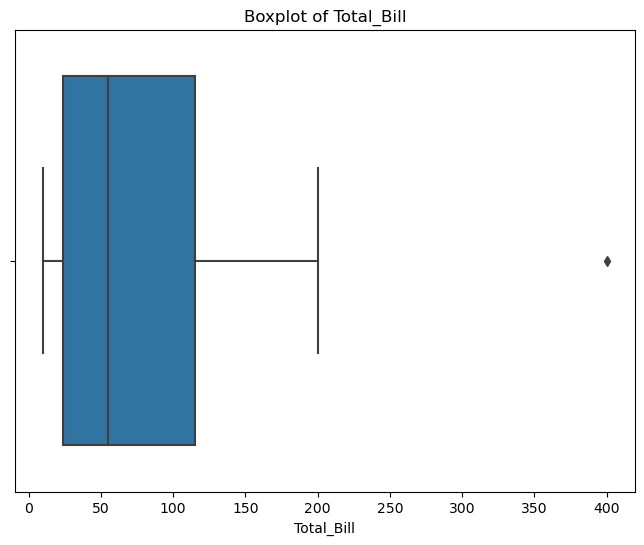

In [5]:
#Step 2: Create a Boxplot
# Boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Total_Bill')
plt.title("Boxplot of Total_Bill")
plt.xlabel("Total_Bill")
plt.show()


In [7]:

#Step 3: Identify Outliers Programmatically
# Calculate Q1, Q3, and IQR
Q1 = df['Total_Bill'].quantile(0.25)  # 1st quartile
Q3 = df['Total_Bill'].quantile(0.75)  # 3rd quartile
IQR = Q3 - Q1  # Interquartile Range

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Total_Bill'] < lower_bound) | (df['Total_Bill'] > upper_bound)]
print("Outliers:\n", outliers)

# Filter out outliers
df_cleaned = df[(df['Total_Bill'] >= lower_bound) & (df['Total_Bill'] <= upper_bound)]
print("\nData without Outliers:\n", df_cleaned)


Outliers:
    Total_Bill
9         400

Data without Outliers:
    Total_Bill
0          10
1          20
2          15
3          35
4          50
5          60
6         100
7         120
8         200


<h3>Data Transformation</h3>
Normalization vs. Standardization
Normalization: Rescales data to [0, 1] or [-1, 1].
Formula: 
   <br><b> x` = x-min(x)/(max(x)-min(x))</b></br>
 
 

In [20]:
df

,Age,Salary
0,25.000000,50000.0
1,33.333333,60000.0
2,35.000000,70000.0
3,40.000000,80000.0
4,33.333333,90000.0


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
print(normalized_data)


[[0.         0.        ]
 [0.55555556 0.25      ]
 [0.66666667 0.5       ]
 [1.         0.75      ]
 [0.55555556 1.        ]]


<h3>Standardization: Scales data to have mean = 0 and standard deviation = 1.</h3>
Formula: 
<br>𝑧=(𝑥−𝜇)/𝜎</br>
x = Feature Value
<br>𝜇 = Mean</br>
𝜎 = Std Deviation
 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-1.7251639  -1.41421356]
 [ 0.         -0.70710678]
 [ 0.34503278  0.        ]
 [ 1.38013112  0.70710678]
 [ 0.          1.41421356]]
